# Using _pykbi_ to analyze radial distribution functions

In this notebook we demonstrate how _pykbi_ can be used to study radial distribution functions, and how we can use the built-in finite size correction methods to account for the finite size correction of the simulation box. 

_pykbi_ relies on the built in module RDF that will keep the rdf-data. It can use various methods to integrate and work with this data. When we have the finial Kirkwood-Buff integrals, the module _pcf_ will allow us to calculate some of the values found using Kirkwood-Buff integrals. 

We can easily work with rdf-data, by importing the pykbi-module. We import numpy at the same time, since we are going to need numpy arrays to keep data.

In [1]:
import pykbi
import numpy as np

## Importing data and assigning them to RDF objects

Radial distribution functions (from now on refered to as g(r)) can be calculated directly in most simulation software, and is usually printed directly in a txt-file. In this case, we will use a g(r) function calculated from two simulations in the NVT ensemble for a three-component system. The g(r) functions from each simulation is printed in a file with the first column being the r-vector, telling the radial distance. The second column is the 1-1 interaction, the third column is the 2-2 interaction, fourth column is 3-3 interaction, fifth colum is 1-2 interaction, sixth column is 1-3 interaction, and sevent column is the 2-3 interaction. This can be different from simulation software to software, and you have to refer to the manual of the software you are using. 

In addition, we know that rdf1.txt has a simulation system of size Lt=14.8245984505 of all sides, and N1 = 1200, N2 = 600, N3 = 600. rdf2.txt has Lt=9.8313208864 and N1 = 350, N2=175, N3 = 175. The systems have the same composition, but different sizes. This can be useful later when we will use the Inverse N-finite size correction. 


We start by importing the data, in this case this can easily be done using the numpy.loadtxt function.

In [2]:
rawrdf1 = np.loadtxt("rdf1.txt")
rawrdf2 = np.loadtxt("rdf2.txt")
print(rawrdf1.shape)
print(rawrdf2.shape)

(700, 7)
(351, 7)


Here we see that we have read the files, and added them to numpy.ndarrays, and they have the same number of columns, while the number of rows are difference, due to the different boxsize of the simulations. We will now add these to rdf-objects. We use a notation where the rdf1.txt are stored in rdf objects, and use a subscript with two digits to indicate the interaction type.

In [3]:
Lt1 = 14.8245984505
N1 = 1200
N2 = 600
N3 = 600
rdf1_11 = pykbi.rdf.RDF(rawrdf1[:,0],rawrdf1[:,1],box_size=Lt1,npart=N1,eqint=True,name="rdf1, 11")
rdf1_22 = pykbi.rdf.RDF(rawrdf1[:,0],rawrdf1[:,2],box_size=Lt1,npart=N2,eqint=True,name="rdf1, 22")
rdf1_33 = pykbi.rdf.RDF(rawrdf1[:,0],rawrdf1[:,3],box_size=Lt1,npart=N3,eqint=True,name="rdf1, 33")
rdf1_12 = pykbi.rdf.RDF(rawrdf1[:,0],rawrdf1[:,4],box_size=Lt1,npart=N1,eqint=False,name="rdf1, 12")
rdf1_13 = pykbi.rdf.RDF(rawrdf1[:,0],rawrdf1[:,5],box_size=Lt1,npart=N1,eqint=False,name="rdf1, 13")
rdf1_23 = pykbi.rdf.RDF(rawrdf1[:,0],rawrdf1[:,6],box_size=Lt1,npart=N2,eqint=False,name="rdf1, 23")
rdf1_list = [rdf1_11,rdf1_22,rdf1_33,rdf1_12,rdf1_13,rdf1_23]


Here we have added all the radial distrbituion functions from one system. Notice two things. On the first three, we have set the "eqint" variable to be True, since they have been calculated between equal types of molecules. On the last three this is set to false, since the value is calculated between unequal types of molecules. In addition, we have set the Npart paramter to be N1, N2, and N3 on the first three, while the last three N1, N1, and N2 to be the number of molecules. These parameters are used in correcting the Fintite-size effects. For the unequal type of molecule interactions, this parameter can be set as either one of the two participating species. In this case, we have choosen to use the paramter that follows the lowest index. 


We can also add the paramters for the second type. Here we will do that using a few lists, and a loop. 

In [4]:
Lt2=9.8313208864
N1_2 = 350
N2_2 = 175
N3_2 = 175
Nparts = [N1_2, N2_2, N3_2, N1_2, N1_2, N2_2]
label = ["11", "22", "33", "12", "13", "23"]
eqints = [True, True, True, False, False, False]
rdf2_list = []
for i in range(6):
    rdf2_list.append(pykbi.rdf.RDF(rawrdf2[:,0],rawrdf2[:,i+1],
                                   box_size=Lt2,
                                   npart=Nparts[i],
                                   eqint=eqints[i],
                                   name=("rdf2, "+label[i])
                                  ))


We have now stored both sets of rdfs lists. We can use this to iterate over them, and do calculations. First, we will try and plot them very quickly: 


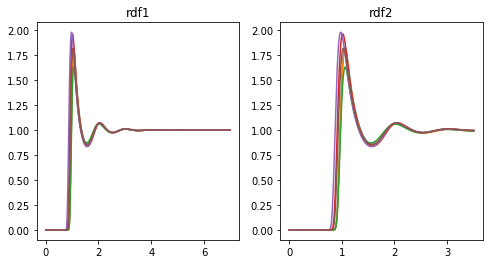

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set_title("rdf1")
ax2.set_title("rdf2")

for i in range(6):
    rdf1_list[i].PlotRDF(ax1)
    rdf2_list[i].PlotRDF(ax2)
    
plt.show()

We can already here demonstrate how the integration takes place. The rdf has not been corrected for finite size effects yet, but we can already integrate it with the assumption that the system is closed. 

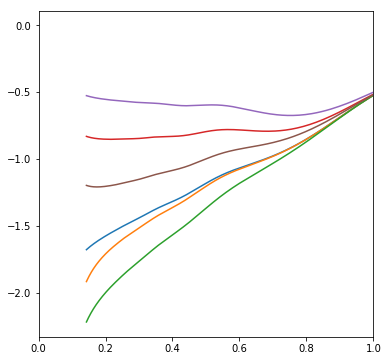

In [7]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)

for i in range(6):
    rdf1_list[i].Integrate("closed")
    rdf1_list[i].PlotKBIInverse(ax)

ax.set_xlim(0,1.0)
plt.show()

The data can be extracted from the figure by using the FindValues function. 

KBI value for rdf1, 11: -1.8404743970515143
KBI value for rdf1, 22: -2.076069593598972
KBI value for rdf1, 33: -2.4476411025410387
KBI value for rdf1, 12: -0.8718683015950529
KBI value for rdf1, 13: -0.5130893377796509
KBI value for rdf1, 23: -1.319864076555812


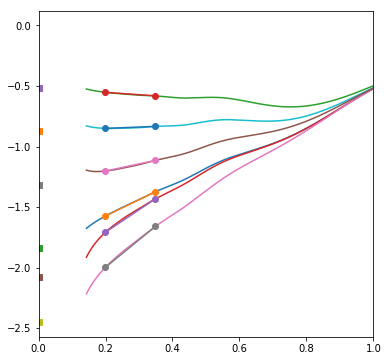

In [8]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)

for i in range(6):
    rdf1_list[i].FindValues(position=(0.2,0.35))
    print("KBI value for {}: {}".format(rdf1_list[i].name, rdf1_list[i].ReturnKBI()))
    rdf1_list[i].PlotKBIInverse(ax)
    rdf1_list[i].PlotReadout(ax)
    
ax.set_xlim(0,1.0)
plt.show()    

## Finite size corrections

When g(r) is sampled from molecular simulations, they will usually suffer from finite-size effects. pykbi has the possibility to correct for some of these finite size effects. Currently, we have the Inverse N-scaling (Krüger et al.[dx.doi.org/10.1021/jz301992u] and the method by Nico van der Vegt implemented. The recommended method is the one offered by van der Vegt. Here we will demonstrate both of these methods. 


### van der Vegt correction 

The van der Vegt correction can be found in the pykbi.fscorr package. It requires only one g(r) function, and it must have the Lt and Npart paramters set. Here we will demonstrate how this is done for the rdf1_list. The function generates a new RDF-object, and returns it.